In [1]:
#!pip install transformers --upgrade --no-deps
#!pip install protein-bert --no-deps
#!pip install tensorflow_addons
# !pip install torch
# !pip install --upgrade jupyter
# !pip install --upgrade  ipywidgets
#import tensorflow as tf

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [3]:
os.getcwd()

'/Users/samuelchazy/ML_files_X/Applied_Projects/Competitions/Kaggle/Novozymes_Enzymes_stability'

# Get the files & drop null values

In [4]:
file_1='code/data/train.csv'
file_2='code/data/train_updates_20220929.csv'

In [5]:
df_one = pd.read_csv(file_1)
df_one

seq_id                                   protein_sequence   pH  \
0           0  AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...  7.0   
1           1  AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...  7.0   
2           2  AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...  7.0   
3           3  AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...  7.0   
4           4  AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...  7.0   
...       ...                                                ...  ...   
31385   31385  YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...  7.0   
31386   31386  YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...  7.0   
31387   31387  YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...  7.0   
31388   31388  YYSFSDNITTVFLSRQAIDDDHSLSLGTISDVVESENGVVAADDAR...  7.0   
31389   31389  YYVPDEYWQSLEVAHKLTFGYGYLTWEWVQGIRSYVYPLLIAGLYK...  7.0   

                             data_source    tm  
0      doi.org/10.1038/s41592-020-0801-4  75.7  
1      doi.org/10.1038/s41592-020-0801-4  50.5  
2      doi.org/10.1038/s41592-020-0801-4  40.5  
3      doi.org/10.1038/s41592-020-0801-4  47.2  
4      doi.org/10.1038/s41592-020-0801-4  49.5  
...                                  ...   ...  
31385  doi.org/10.1038/s41592-020-0801-4  51.8  
31386  doi.org/10.1038/s41592-020-0801-4  37.2  
31387  doi.org/10.1038/s41592-020-0801-4  64.6  
31388  doi.org/10.1038/s41592-020-0801-4  50.7  
31389  doi.org/10.1038/s41592-020-0801-4  37.6  

[31390 rows x 5 columns]

In [6]:
df_two = pd.read_csv(file_2)
df_two = df_two.dropna(subset='protein_sequence')
df_two.head(3)

seq_id                                   protein_sequence   pH  \
25     973  DTSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...  7.0   
28     986  DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVTFQNRESVLPT...  7.0   
29     988  DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFANRESVLPT...  7.0   

    data_source    tm  
25          NaN  48.4  
28          NaN  48.4  
29          NaN  49.0

### Validation data

In [7]:
file_3 = 'code/data/test.csv'
validation_data = pd.read_csv(file_3)
validation_data = validation_data.drop('data_source',axis=1)

validation_data.head(3)

seq_id                                   protein_sequence  pH
0   31390  VPVNPEPDATSVENVAEKTGSGDSQSDPIKADLEVKGQSALPFDVD...   8
1   31391  VPVNPEPDATSVENVAKKTGSGDSQSDPIKADLEVKGQSALPFDVD...   8
2   31392  VPVNPEPDATSVENVAKTGSGDSQSDPIKADLEVKGQSALPFDVDC...   8

# Merge the files

In [8]:
df_one_two = df_one.copy()

In [9]:
for i,row_one in enumerate(df_one['seq_id'].values):
    for j,row_two in enumerate(df_two['seq_id'].values):
        if row_one == row_two:
            df_one_two.iloc[i,:] = df_two.iloc[j,:]

# Clean the data

In [10]:
df_one_two.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31390 entries, 0 to 31389
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   seq_id            31390 non-null  int64  
 1   protein_sequence  31390 non-null  object 
 2   pH                31104 non-null  float64
 3   data_source       28043 non-null  object 
 4   tm                31390 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


In [11]:
df_one_two.describe()

seq_id            pH            tm
count  31390.000000  31104.000000  31390.000000
mean   15694.500000      6.856534     49.183202
std     9061.656811      1.009352     13.957499
min        0.000000      1.990000     -1.000000
25%     7847.250000      7.000000     42.100000
50%    15694.500000      7.000000     48.000000
75%    23541.750000      7.000000     53.800000
max    31389.000000     53.400000    130.000000

# Replace null values

In [12]:
df_one_two.isna().sum()

seq_id                 0
protein_sequence       0
pH                   286
data_source         3347
tm                     0
dtype: int64

In [13]:
df_one_two = df_one_two.dropna(subset='pH')

In [14]:
df_one_two = df_one_two.reset_index(drop=True)
df_one_two.head(3)

seq_id                                   protein_sequence   pH  \
0       0  AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...  7.0   
1       1  AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...  7.0   
2       2  AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...  7.0   

                         data_source    tm  
0  doi.org/10.1038/s41592-020-0801-4  75.7  
1  doi.org/10.1038/s41592-020-0801-4  50.5  
2  doi.org/10.1038/s41592-020-0801-4  40.5

In [15]:
df_one_two[df_one_two['pH'] > 12]

seq_id                                   protein_sequence    pH  \
22104   22116  MRNTGAGPSPSVSRPPPSAAPLSGAALAAPGDAPSALYAPSALVLT...  53.4   
22111   22123  MRNTGAGPSPSVSRPPPSAAPLSGAALAAPGDAPSALYAPSALVLT...  53.4   
22119   22131  MRNTGAGPSPSVSRPPPSAAPLSGAALAAPGDAPSALYAPSALVLT...  53.4   
22133   22145  MRNTGAGPSPSVSRPPPSAAPLSGAALAAPGDAPSALYAPSALVLT...  53.4   

      data_source   tm  
22104         NaN  0.1  
22111         NaN  1.2  
22119         NaN  0.6  
22133         NaN  0.1

In [16]:
for i,value in enumerate(df_one_two['pH'].values):
    if value > 12:
        print(i,value)
        df_one_two.iloc[i,2] = round(df_one_two['pH'].mean(),1)

22104 53.4
22111 53.4
22119 53.4
22133 53.4


In [17]:
df_one_two[df_one_two['pH'] > 12]

Empty DataFrame
Columns: [seq_id, protein_sequence, pH, data_source, tm]
Index: []

# Drop data_source column

In [18]:
df_one_two = df_one_two.drop('data_source',axis=1)
df_one_two.head(3)

seq_id                                   protein_sequence   pH    tm
0       0  AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...  7.0  75.7
1       1  AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...  7.0  50.5
2       2  AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...  7.0  40.5

# Drop outliers

In [19]:
# outlier = df_one_two['protein_sequence'].apply(len)
# outlier = outlier[outlier > 1000]
# outlier

In [20]:
# df_one_two = df_one_two.drop(outlier.index,axis=0)
# print(df_one_two.shape)
# df_one_two.head(2)

# Univariate graphs

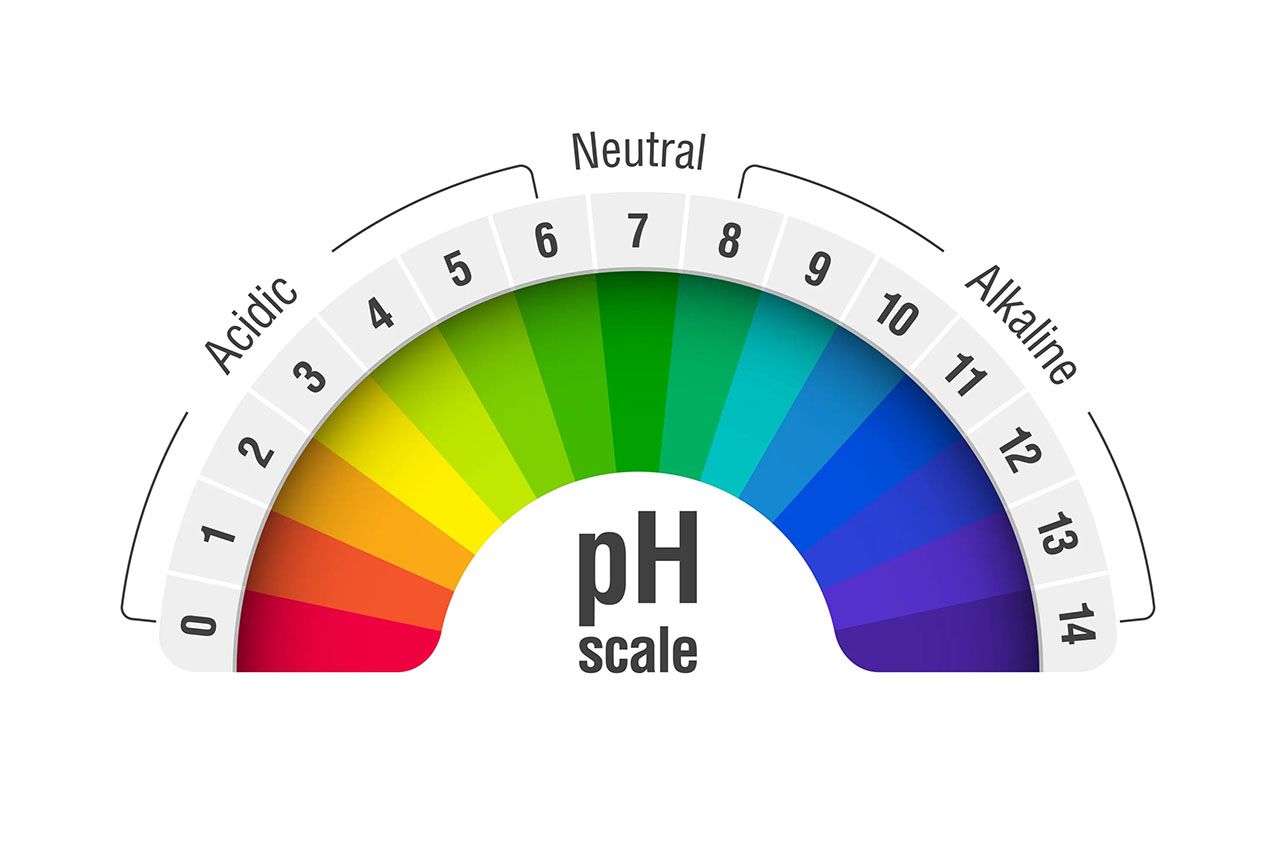

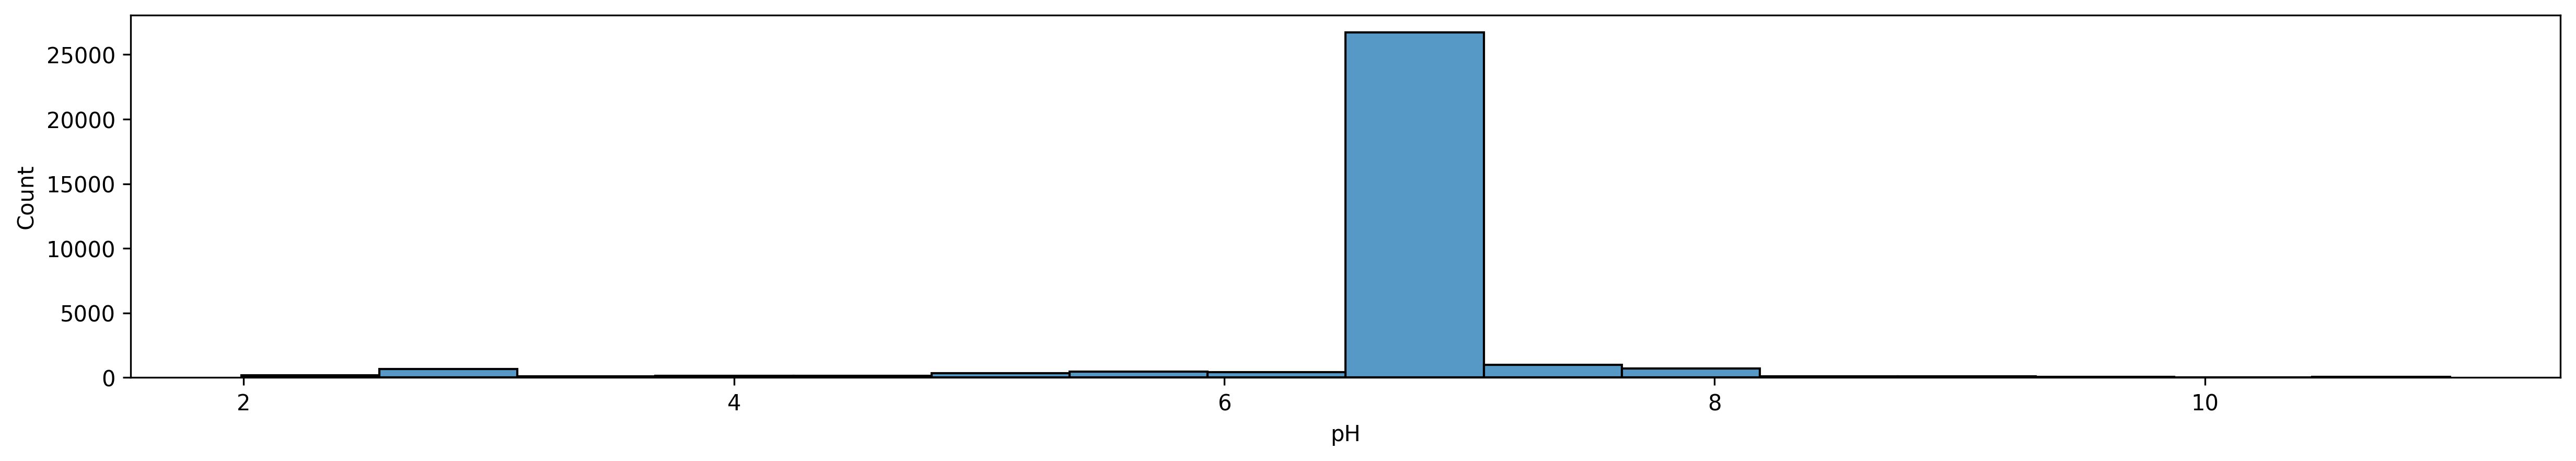

In [21]:
ax,fig = plt.subplots(figsize=(20,3),dpi=300)
ax = sns.histplot(x=df_one_two['pH'])

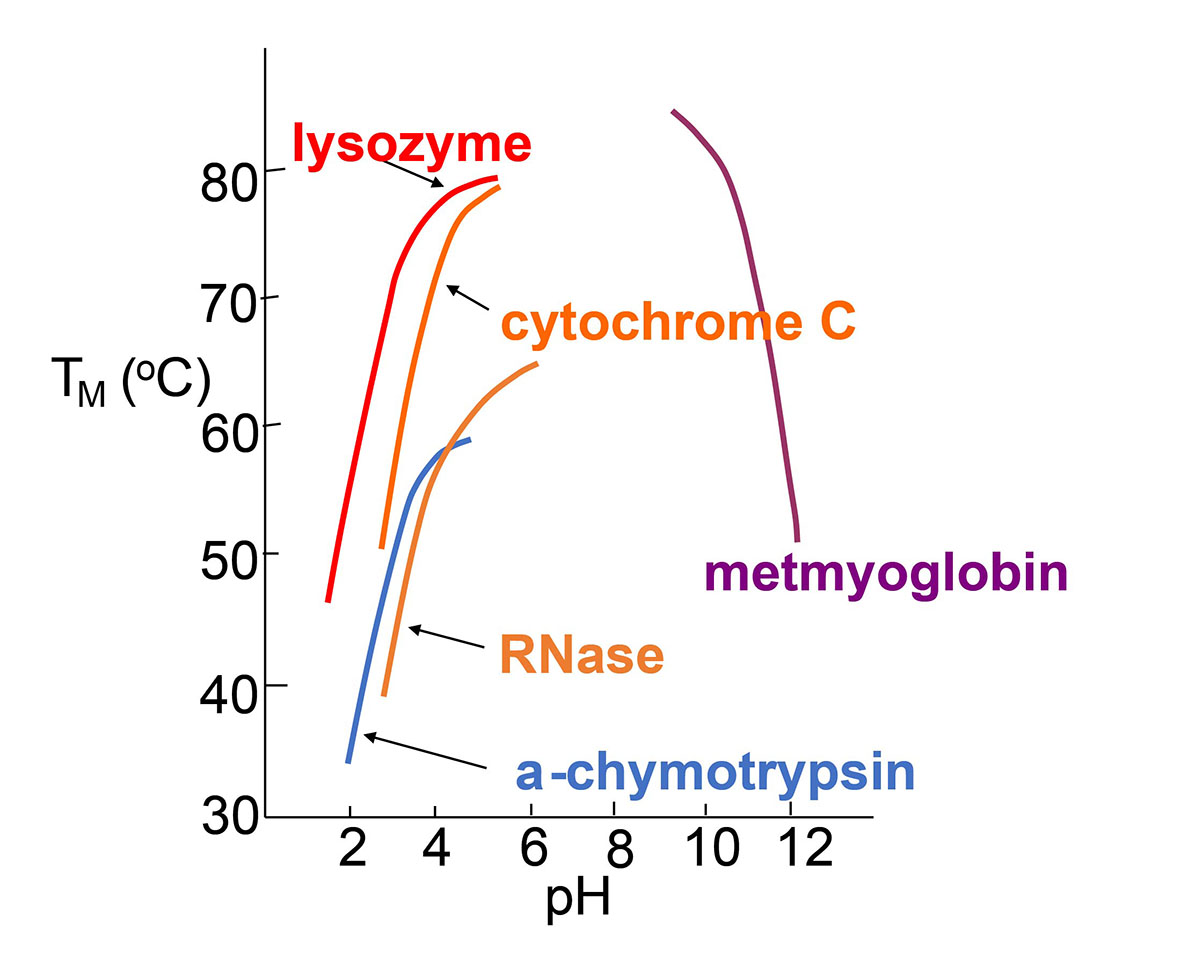

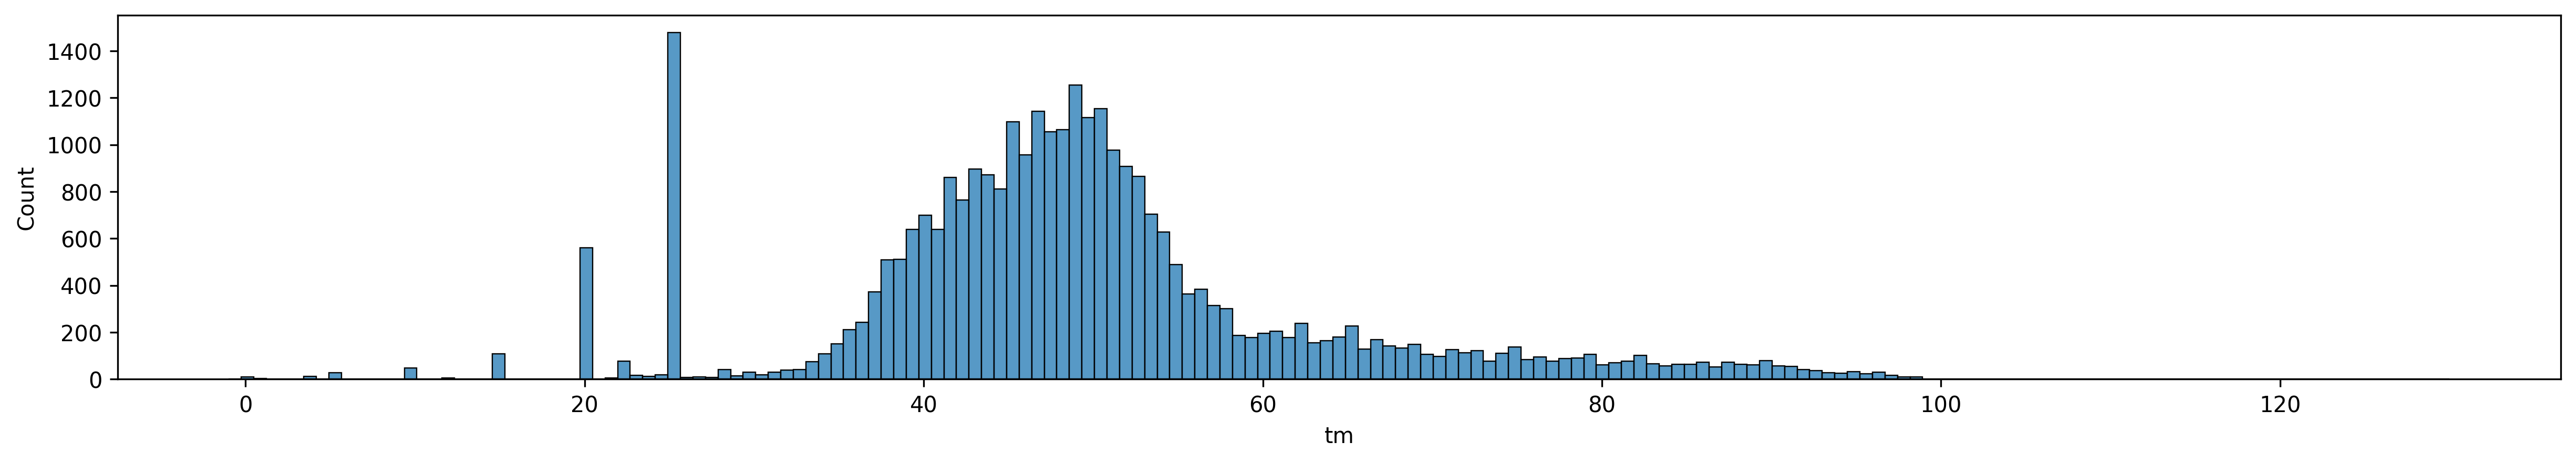

In [22]:
ax,fig = plt.subplots(figsize=(20,3),dpi=300)
ax = sns.histplot(x=df_one_two['tm'])

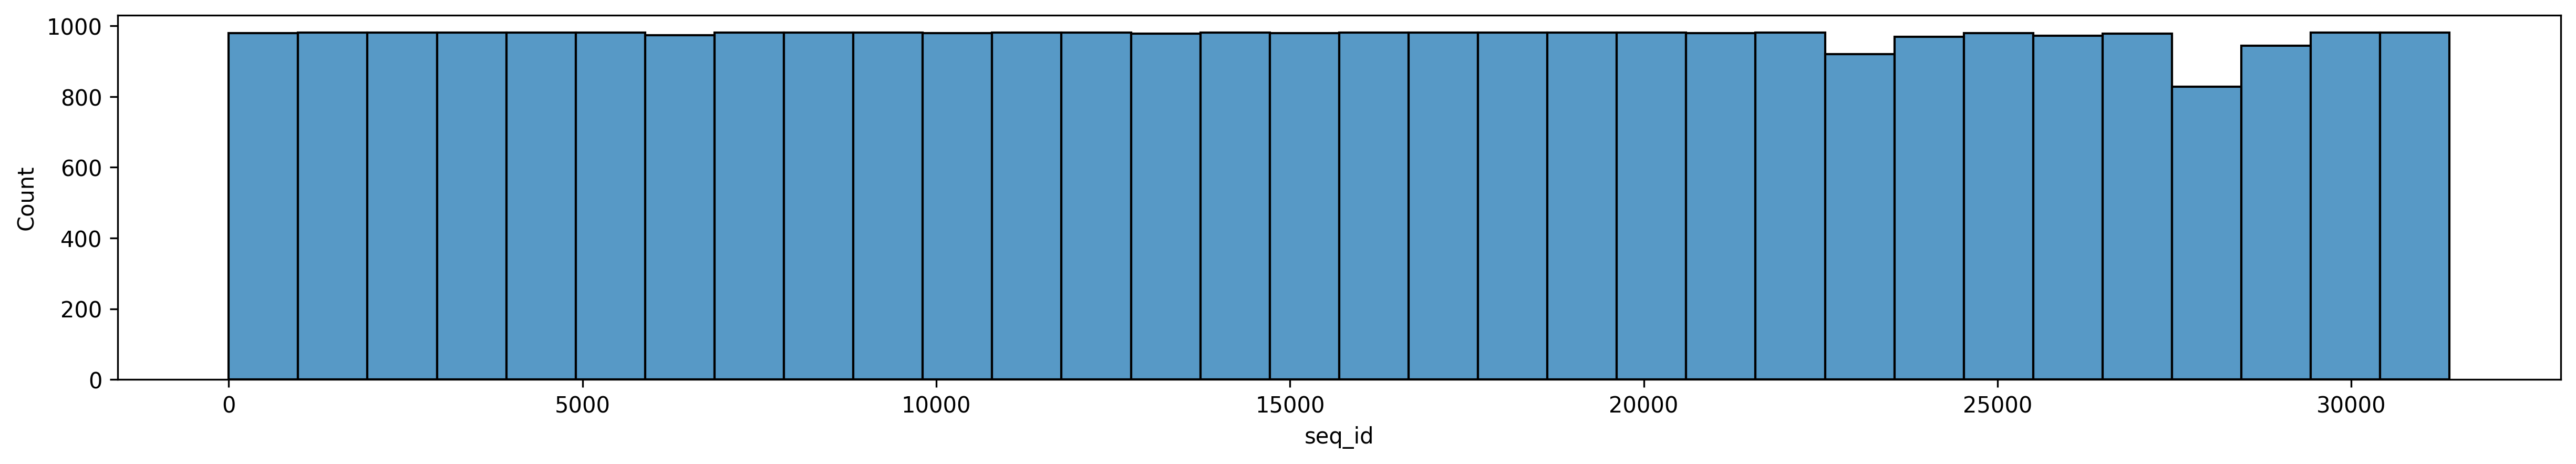

In [23]:
ax,fig = plt.subplots(figsize=(20,3),dpi=300)
ax = sns.histplot(x=df_one_two['seq_id'])

# Multivariate graphs

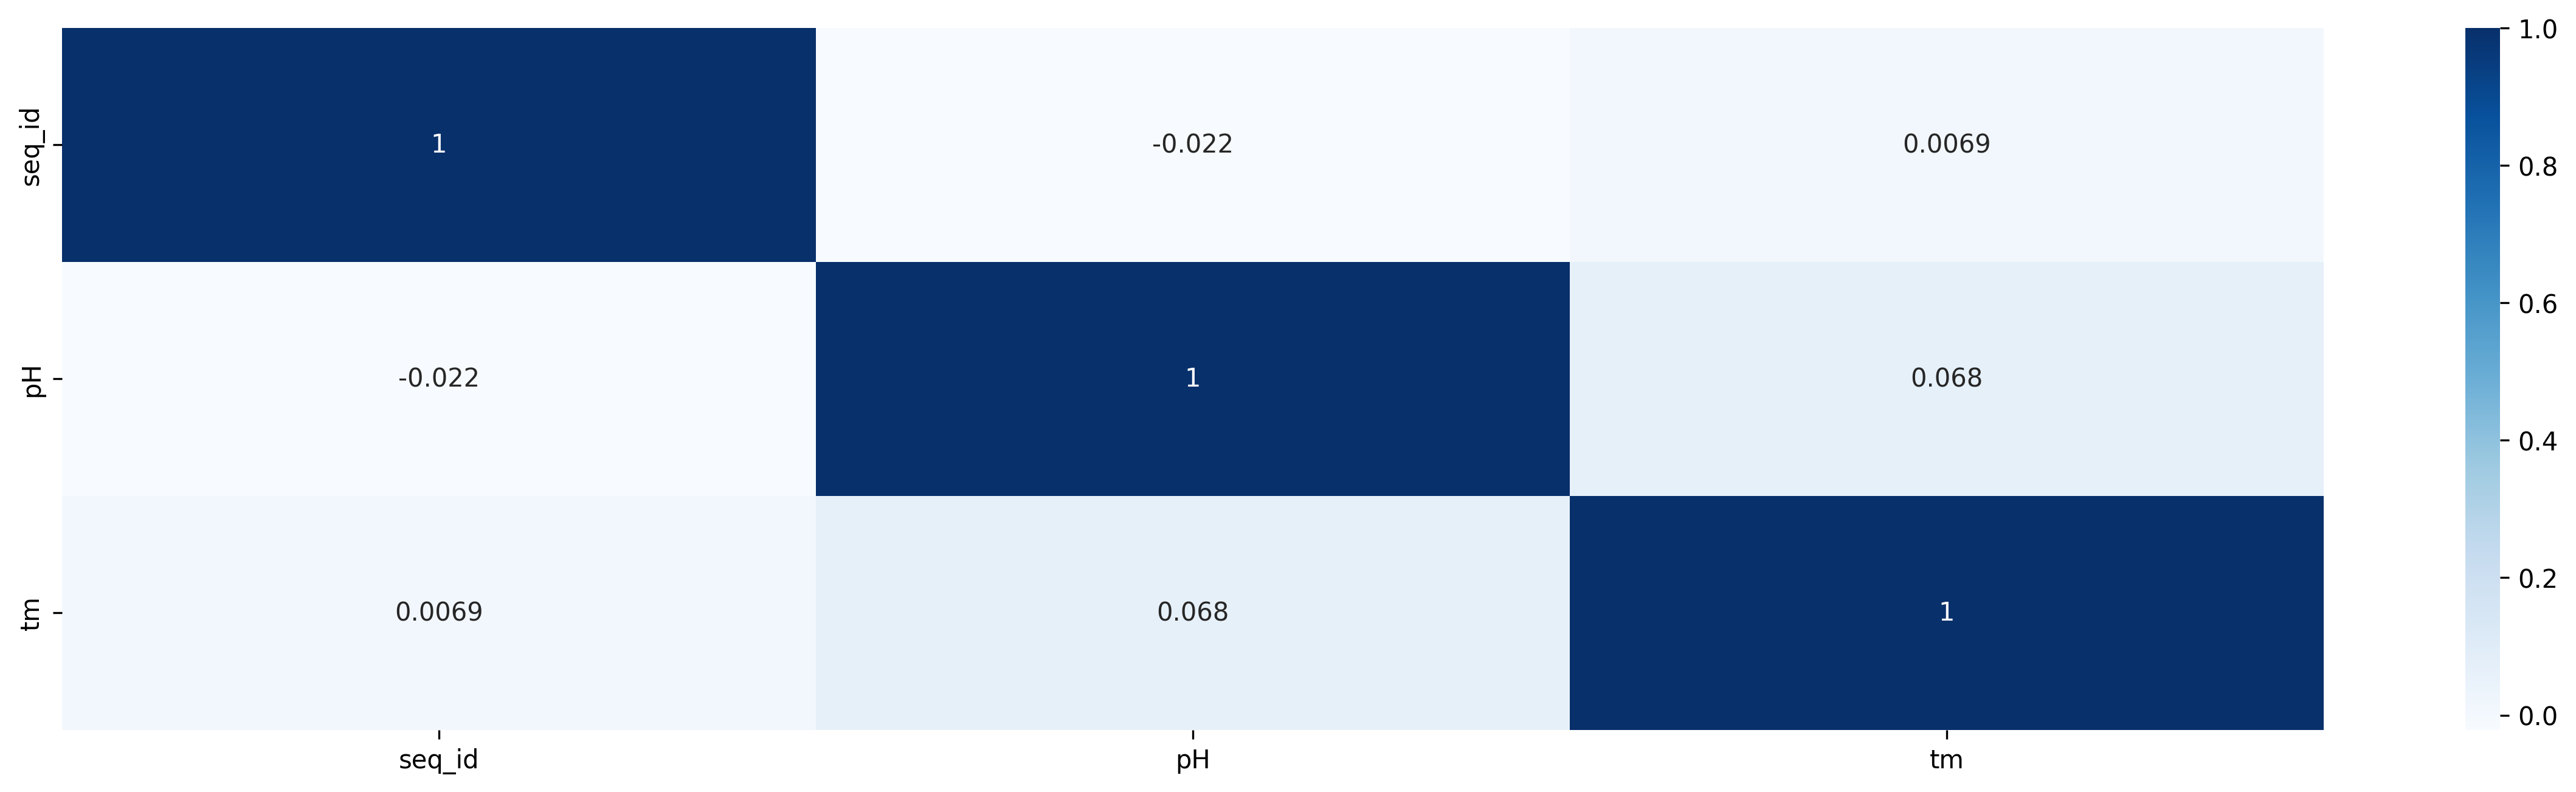

In [24]:
cor = df_one_two.drop('protein_sequence', axis=1).corr()
ax,fig = plt.subplots(figsize=(20,5),dpi=300)
ax = sns.heatmap(data=cor,annot=True,cmap='Blues')

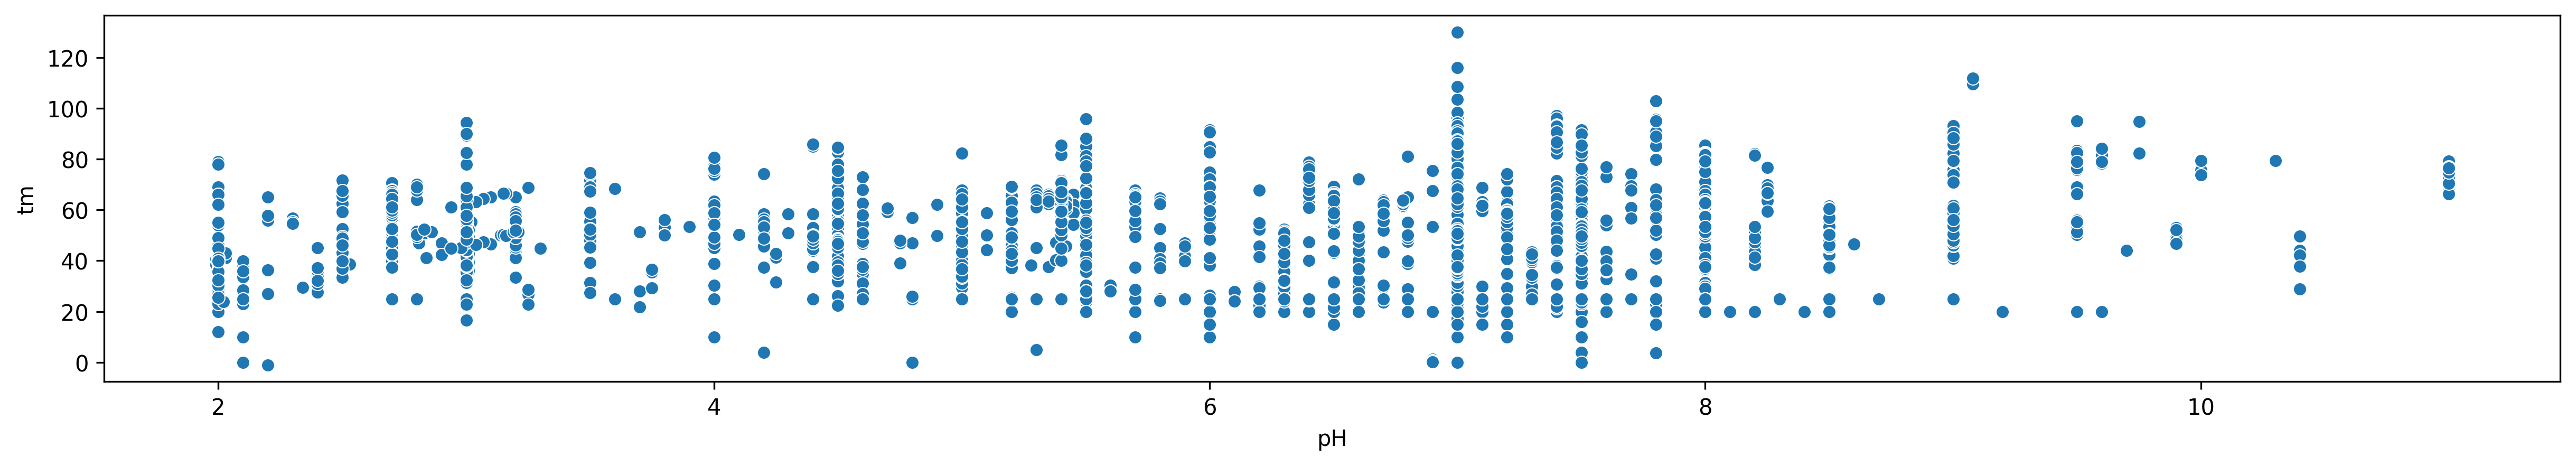

In [25]:
ax,fig = plt.subplots(figsize=(20,3),dpi=300)
ax = sns.scatterplot(x=df_one_two['pH'],y=df_one_two['tm'])

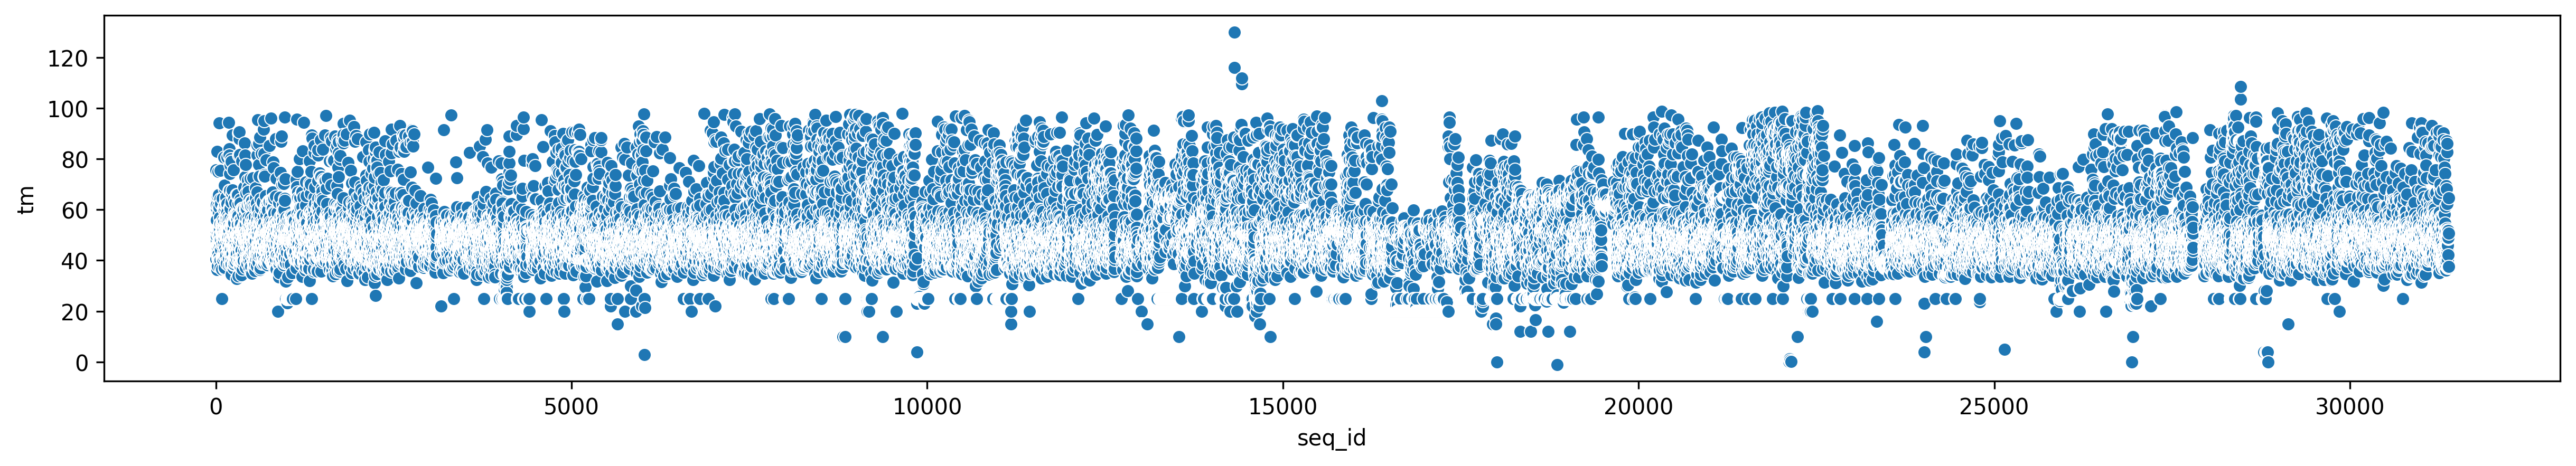

In [26]:
ax,fig = plt.subplots(figsize=(20,3),dpi=300)
ax = sns.scatterplot(x=df_one_two['seq_id'],y=df_one_two['tm'])

In [27]:
df_one_two.head()

seq_id                                   protein_sequence   pH    tm
0       0  AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...  7.0  75.7
1       1  AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...  7.0  50.5
2       2  AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...  7.0  40.5
3       3  AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...  7.0  47.2
4       4  AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...  7.0  49.5

# Feature Engineering & Transformations

In [28]:
X = df_one_two.drop(['tm'],axis=1)
y = df_one_two['tm']

# X = X.iloc[:100,:]
# y = y.iloc[:100]

In [29]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans,DBSCAN
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

# Transform X

In [30]:
def transform_X(X):
    
    ################################ add protein length ################################
    for i,seq in enumerate(X['protein_sequence'].values):
        length = len(seq)
        X.loc[i,'protein_length'] = length
        
    ################################ add ph classification level ################################
    X['pH_strength'] = X['pH']
    for i,p in enumerate(X['pH_strength'].values):
        if p < 4:
            X.loc[i,'pH_strength'] = 0
        if p >= 4 and p < 6:
            X.loc[i,'pH_strength'] = 25
        if p >= 6 and p <= 8:
            X.loc[i,'pH_strength'] = 100
        if p > 8 and p <= 10:
            X.loc[i,'pH_strength'] = 25
        if p > 10:
            X.loc[i,'pH_strength'] = 0
            
    ################################ encode protein sequences ################################
    encoder = LabelEncoder().fit(X['protein_sequence'])
    
    seq_X = X['protein_sequence']
    X['coded_protein_seq'] = encoder.transform(seq_X)
    
    ################################### cluster the data ################################
    ### protein length ###
    dbscan = DBSCAN(eps=0.2,min_samples=25)
    clusters = dbscan.fit(pd.DataFrame(X['protein_length']))
    clusters = pd.DataFrame(clusters.labels_)
    X['protein_length_cluster'] = clusters
    
    ################################### convert protein sequences into columns with count of the number of letters ###################################
    alphabet = 'ACDEFGHIKLMNPQRSTVWY'
    df_alphabet = pd.DataFrame(np.zeros([len(X),len(alphabet)]),columns=[a for a in alphabet])

    df_combined = pd.concat([X,df_alphabet],axis=1,join='inner').fillna(0)
    df_combined = df_combined.reset_index(drop=True)

    i=0
    for phrase in (tqdm(df_combined['protein_sequence'].values)):
        all_letters = {}
        for letter in phrase:
            if letter in all_letters:
                all_letters[letter] += 1
                col_index = df_combined.columns.get_loc(letter)
                df_combined.iloc[i,col_index] += 1
            else:
                all_letters[letter] = 0
        i += 1
    df_combined = df_combined.drop('protein_sequence',axis=1)

    print(f'Shape of alphabet count = {df_combined.shape}')
    display(df_combined.head(1))
    print('-'*80)
    
    ################################ output ################################
    return df_combined

In [31]:
X_transformed = transform_X(X)
X_transformed.head(3)

100%|████████████████████████████████████████████████████████████████████████████| 31104/31104 [08:32<00:00, 60.67it/s]

Shape of alphabet count = (31104, 26)


seq_id   pH  protein_length  pH_strength  coded_protein_seq  \
0       0  7.0           341.0        100.0                  0   

   protein_length_cluster     A    C     D     E  ...    M    N     P    Q  \
0                       0  44.0  0.0  12.0  29.0  ...  7.0  4.0  17.0  5.0   

      R     S     T     V    W    Y  
0  24.0  10.0  13.0  36.0  3.0  2.0  

[1 rows x 26 columns]

--------------------------------------------------------------------------------


seq_id   pH  protein_length  pH_strength  coded_protein_seq  \
0       0  7.0           341.0        100.0                  0   
1       1  7.0           286.0        100.0                  1   
2       2  7.0           497.0        100.0                  2   

   protein_length_cluster     A    C     D     E  ...    M     N     P     Q  \
0                       0  44.0  0.0  12.0  29.0  ...  7.0   4.0  17.0   5.0   
1                       1  27.0  0.0   9.0  51.0  ...  1.0   5.0   7.0  21.0   
2                      -1  49.0  8.0  26.0  31.0  ...  5.0  14.0  19.0  24.0   

      R     S     T     V    W     Y  
0  24.0  10.0  13.0  36.0  3.0   2.0  
1  29.0  13.0  11.0  12.0  2.0   2.0  
2  30.0  32.0  29.0  29.0  2.0  15.0  

[3 rows x 26 columns]

In [33]:
X_transformed = X_transformed.drop(['seq_id'],axis=1)

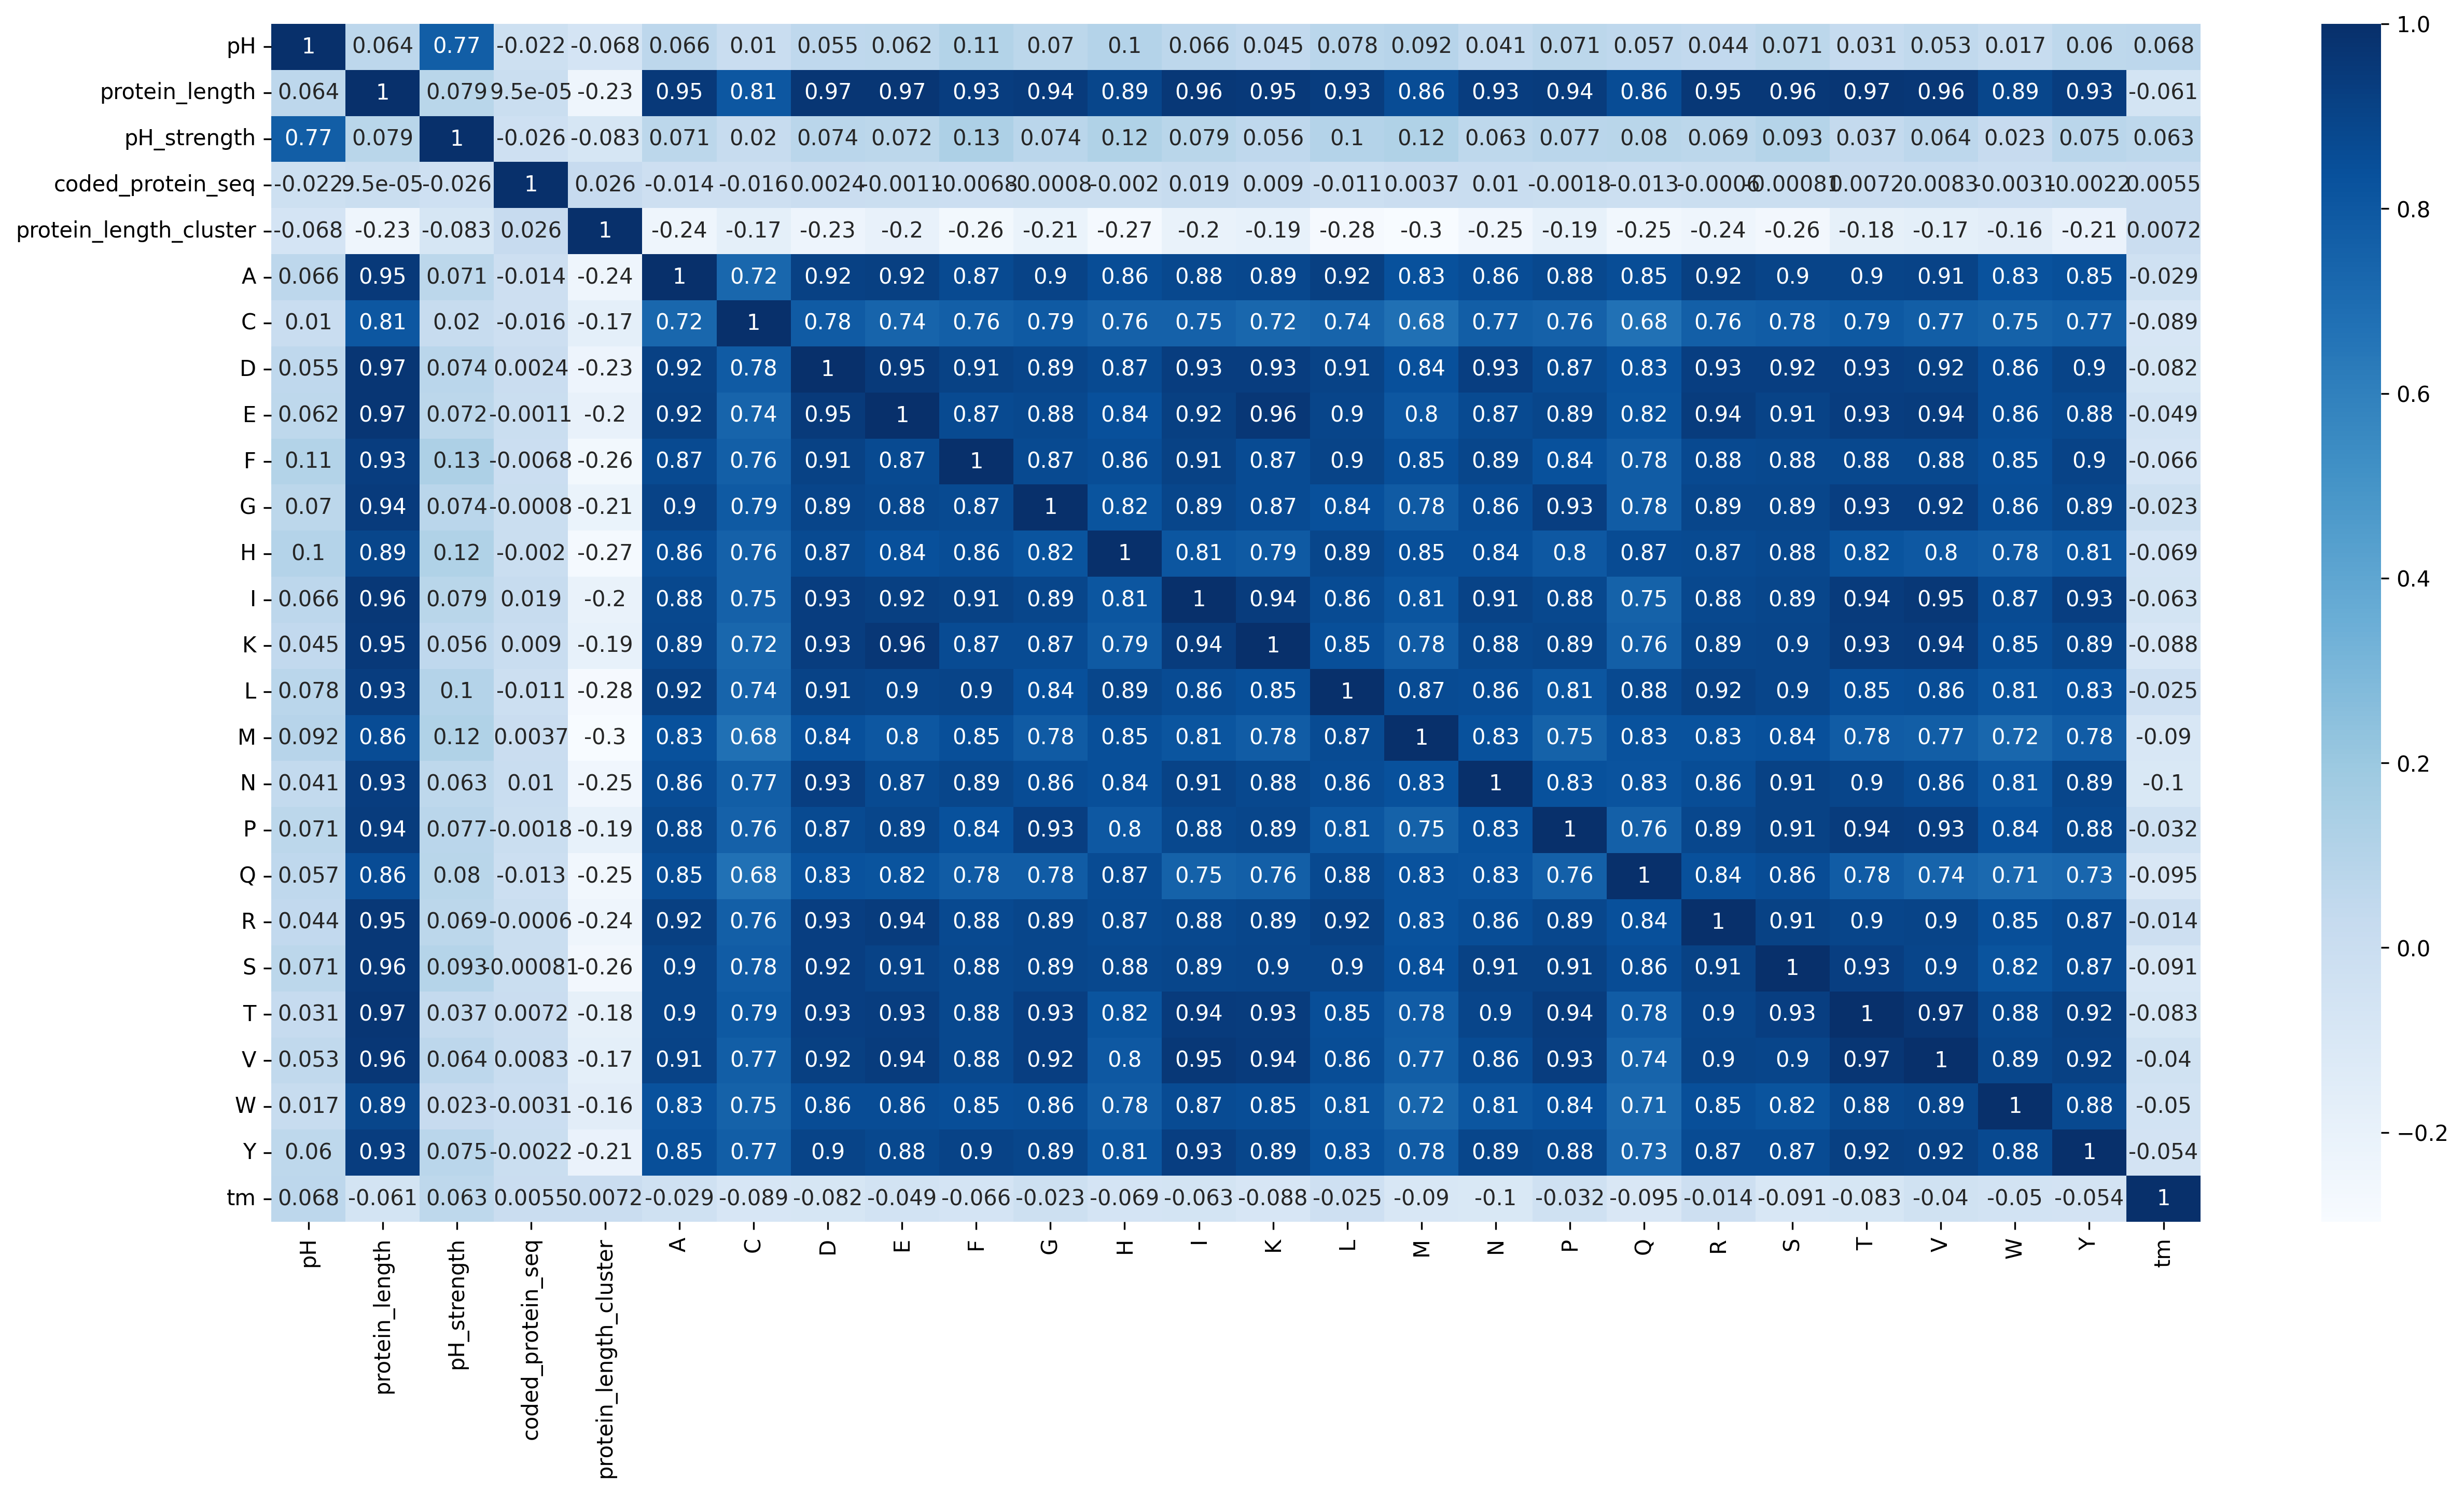

In [34]:
full_df = pd.concat([X_transformed,y],axis=1)
cor = full_df.corr()
ax,fig = plt.subplots(figsize=(20,10),dpi=300)
ax = sns.heatmap(data=cor,annot=True,cmap='Blues',annot_kws={"size":10});

# Transform validation data

In [35]:
# import re
# alphabet = 'ACDEFGHIKLMNPQRSTVWY'

# def get_length(df):
#     for letter in alphabet:
#         count = df['protein_sequence'].str.count(letter)
#         return count

# length_train = get_length(X_train)
# print(f'Length of train data = {length_train.max()}')
# length_test = get_length(X_test)
# print(f'Length of test data = {length_test.max()}')

# width = max(length_train.max(),length_test.max())
# print(f'maximum width = {width}')

In [36]:
def transform_V(Validation_data):
    
    ################################ add protein length ################################
    for i,seq in enumerate(Validation_data['protein_sequence'].values):
        length = len(seq)
        Validation_data.loc[i,'protein_length'] = length
        
    ################################ add ph classification level ################################
    Validation_data['pH_strength'] = Validation_data['pH']
    for i,p in enumerate(Validation_data['pH_strength'].values):
        if p < 4:
            Validation_data.loc[i,'pH_strength'] = 0
        if p >= 4 and p < 6:
            Validation_data.loc[i,'pH_strength'] = 25
        if p >= 6 and p <= 8:
            Validation_data.loc[i,'pH_strength'] = 100
        if p > 8 and p <= 10:
            Validation_data.loc[i,'pH_strength'] = 25
        if p > 10:
            Validation_data.loc[i,'pH_strength'] = 0
            
    ################################ encode protein sequences ################################
    encoder = LabelEncoder().fit(Validation_data['protein_sequence'])
    
    seq_V = Validation_data['protein_sequence']
    Validation_data['coded_protein_seq'] = encoder.transform(seq_V)
    
    # ################################### cluster the data ################################
    ### protein length ###
    dbscan = DBSCAN(eps=0.2,min_samples=25)
    clusters = dbscan.fit(pd.DataFrame(Validation_data['protein_length']))
    clusters = pd.DataFrame(clusters.labels_)
    Validation_data['protein_length_cluster'] = clusters
    
    ################################### convert protein sequences into columns with count of the number of letters ###################################
    alphabet = 'ACDEFGHIKLMNPQRSTVWY'
    df_alphabet = pd.DataFrame(np.zeros([len(Validation_data),len(alphabet)]),columns=[a for a in alphabet])

    df_combined = pd.concat([Validation_data,df_alphabet],axis=1,join='inner').fillna(0)
    df_combined = df_combined.reset_index(drop=True)

    i=0
    for phrase in (tqdm(df_combined['protein_sequence'].values)):
        all_letters = {}
        for letter in phrase:
            if letter in all_letters:
                all_letters[letter] += 1
                col_index = df_combined.columns.get_loc(letter)
                df_combined.iloc[i,col_index] += 1
            else:
                all_letters[letter] = 0
        i += 1
    df_combined = df_combined.drop('protein_sequence',axis=1)

    print(f'Shape of alphabet count = {df_combined.shape}')
    display(df_combined.head(1))
    print('-'*80)
    
    ################################ output ################################
    return df_combined

In [ ]:
validation_data_transformed = transform_V(validation_data)
validation_data_transformed = validation_data_transformed.drop(['seq_id'],axis=1)
validation_data_transformed.head(3)

 66%|██████████████████████████████████████████████████▊                          | 1592/2413 [00:12<00:06, 124.65it/s]

# Split the data into training & testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_transformed,y,test_size=0.2)
X_train = X_train.reset_index(drop=True)
y_train = pd.Series(y_train).reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = pd.Series(y_test).reset_index(drop=True)
X_train.head(1)

In [ ]:
def transform_split(X_train,X_test,X_valid):
    
    ################################ Transformers ################################
    scaler = MinMaxScaler()
    model_PCA = PCA(n_components=9)
    ################################ Training dataframe ################################

    ### Apply Standard scaler normalization to the data ###
    df_scaled_X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=(X_train.columns))
    print(f'Shape of scaled dataframes = {df_scaled_X_train.shape}')
    display(df_scaled_X_train.head(1))
    print('-'*80)

    # ### Apply principle component analysis to reduce the columns ###
    # df_decomposed_X_train = pd.DataFrame(model_PCA.fit_transform(df_scaled_X_train))
    # print('*'*80)
    # print(model_PCA.explained_variance_ratio_)
    # print('*'*80)
    # print(f'Shape of PCA = {df_decomposed_X_train.shape}')
    # print('-'*80)
    
    ################################ testing dataframe ################################

    ### Apply Standard scaler normalization to the data ###
    df_scaled_X_test = pd.DataFrame(scaler.transform(X_test),columns=(X_test.columns))
    print(f'Shape of scaled dataframes = {df_scaled_X_test.shape}')
    display(df_scaled_X_test.head(1))
    print('-'*80)

    # ### Apply principle component analysis to reduce the columns ###
    # df_decomposed_X_test = pd.DataFrame(model_PCA.transform(df_scaled_X_test))
    # print('*'*80)
    # print(f'Shape of PCA = {df_decomposed_X_test.shape}')
    # print('-'*80)
    
    ################################ validation dataframe ################################

    ### Apply Standard scaler normalization to the data ###
    df_scaled_X_valid = pd.DataFrame(scaler.transform(X_valid),columns=(X_valid.columns))
    print(f'Shape of scaled dataframes = {df_scaled_X_valid.shape}')
    display(df_scaled_X_valid.head(1))
    print('-'*80)

    # ### Apply principle component analysis to reduce the columns ###
    # df_decomposed_X_valid = pd.DataFrame(model_PCA.transform(df_scaled_X_valid))
    # print('*'*80)
    # print(f'Shape of PCA = {df_decomposed_X_valid.shape}')
    # print('-'*80)
    
    ################################ Output ################################
    
    return df_scaled_X_train,df_scaled_X_test,df_scaled_X_valid

In [ ]:
X_train_final,X_test_final,X_valid_final = transform_split(X_train,X_test,validation_data_transformed)

In [ ]:
X_train_final.head(2)

In [ ]:
X_test_final.head(2)

In [ ]:
X_valid_final.head(2)

# Build a regression base model

In [ ]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train_final,y_train)

y_pred = model_LR.predict(X_test_final)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score

mae = round(mean_absolute_error(y_test,y_pred),3)
print(f'MAE = {mae}')
print('-'*80)

mse = round(mean_squared_error(y_test,y_pred),3)
print(f'MSE = {mse}')
print('-'*80)

rmse = round(np.sqrt(mean_squared_error(y_test,y_pred)),3)
print(f'RMSE = {rmse}')
print('-'*80)

r2score = round(r2_score(y_test,y_pred),3)
print(f'r2_score = {r2score}')
print('-'*80)

# Build an XGboost model

In [ ]:
#!pip install XGboost

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint

# random_grid={'max_depth':list(np.arange(3,13, step=2)),
#               'n_estimators':np.arange(500, 3000, step=250),
#               'learning_rate':[0.01,0.03,0.05,0.08]}

# xgb_model = xgboost.XGBRegressor(random_state = 42)
# xgb_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=random_grid,
#                               n_iter = 50, scoring='neg_mean_absolute_error', 
#                               cv =3, verbose=2, random_state=42, n_jobs=-1,
#                               return_train_score=True)

# # Fit the random search model
# xgb_search.fit(X_train_final,y_train)

In [ ]:
# xgb_search.best_estimator_

In [ ]:
import xgboost

xgb_model = xgboost.XGBRegressor(n_estimators=1250,max_depth=4,learning_rate=0.05)
xgb_model.fit(X_train_final,y_train)

y_pred_xgboost = xgb_model.predict(X_test_final)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score

mae = round(mean_absolute_error(y_test,y_pred_xgboost),3)
print(f'MAE = {mae}')
print('-'*80)

mse = round(mean_squared_error(y_test,y_pred_xgboost),3)
print(f'MSE = {mse}')
print('-'*80)

rmse = round(np.sqrt(mean_squared_error(y_test,y_pred_xgboost)),3)
print(f'RMSE = {rmse}')
print('-'*80)

r2score = round(r2_score(y_test,y_pred_xgboost),3)
print(f'r2_score = {r2score}')
print('-'*80)

# Predict the validation data

In [ ]:
y_pred_xgboost = xgb_model.predict(X_valid_final)
y_pred_xgboost

# Build final dataframe

In [ ]:
# # define the temperature range
# T_GOOD_high = 35
# T_GOOD_low = 10
# T_optimal = 24

# def protein_stability(T):
#     if T < T_GOOD_low:
#         return T / (T_optimal + T_GOOD_low)
#     if T > T_GOOD_high:
#         return T_optimal / (T + T_GOOD_low)
#     if T >= T_GOOD_low and T <= T_optimal:
#         return T / T_optimal
#     if T >= T_optimal and T <= T_GOOD_high:
#         return T_optimal / T

#### Dataset without ranking

In [ ]:
submission = pd.DataFrame(validation_data['seq_id'])
submission['tm'] = y_pred_xgboost
submission['tm'] = round(submission['tm'])
submission = submission.sort_values(by='tm',ascending=False).reset_index(drop=True)
submission['tm'] = round(submission['tm'],3)

submission

#### Dataset with ranking

In [ ]:
# submission = pd.DataFrame(X_valid['seq_id'])
# submission['tm'] = y_pred_xgboost
# submission['tm'] = round(submission['tm'])
# submission['rank'] = [protein_stability(t) for t in submission['tm']]
# submission = submission.sort_values(by='rank',ascending=False).reset_index(drop=True)
# submission = submission.drop('tm',axis=1)
# submission = submission.rename(columns={'rank':'tm'})
# submission['tm'] = round(submission['tm'],3)

# submission.head()

In [ ]:
from scipy import stats
rho, pval = stats.spearmanr(submission['seq_id'],submission['tm'])
print(f'correlation = {round(rho,5)}')
print(f'p_value = {round(pval,5)}')

# Save the final file

In [ ]:
submission.to_csv('submission.csv',index=False)